In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('notebooks/data/benin-malanville.csv')

In [28]:
summary_stats = df.describe() # Calculating summary statistics for the DataFrame
print(summary_stats)

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

In [30]:
missing_values = df.isna().sum()  # Count missing values for each column
missing_report = missing_values[missing_values > 0] # Filter to show only columns with missing values
print(missing_report) # Output the report of missing values

Comments    525600
dtype: int64


In [7]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [8]:
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [10]:
from scipy import stats

# Calculate Z-scores for the selected columns
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]))
outliers = (z_scores > 3).any(axis=1)

# Add outlier column to the DataFrame
df['outlier'] = outliers

In [12]:
# Impute missing values with the median for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [13]:
print(df.head())
print(df.isna().sum())  # Check for remaining missing values

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  outlier  
0       NaN    False  
1       NaN    False  
2       NaN    False  
3       NaN 

In [15]:
# Export Cleaned Data
df.to_csv('notebooks/data/benin_clean.csv', index=False)

In [16]:
# Convert the 'Timestamp' column to datetime format for accurate plotting
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\metya\Desktop\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


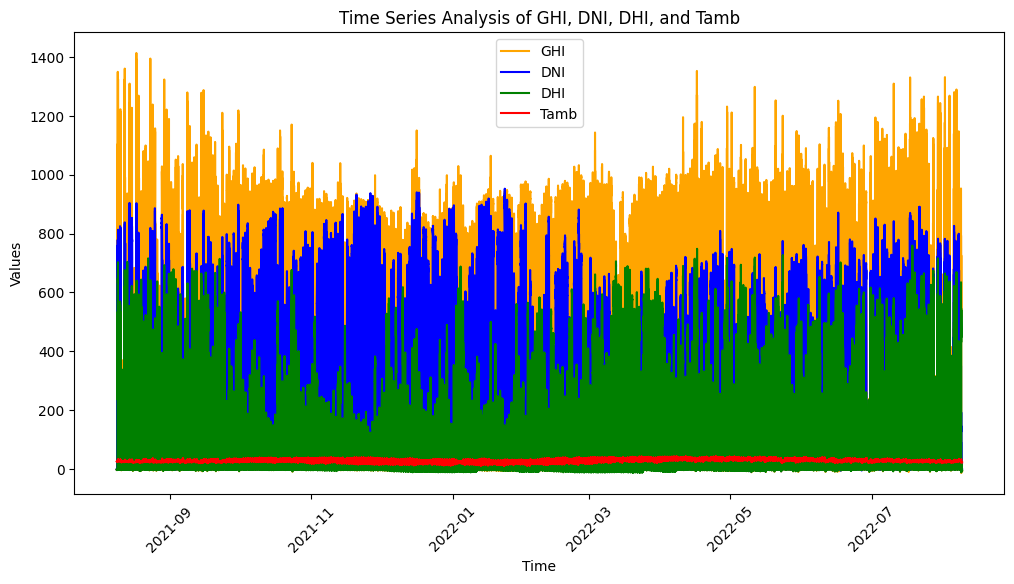

In [17]:
# Plot GHI, DNI, DHI, and Tamb on the same chart to compare trends
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='orange')
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='blue')
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='green')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', color='red')
plt.title('Time Series Analysis of GHI, DNI, DHI, and Tamb')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\metya\AppData\Local\Temp\ipykernel_19560\747233302.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.set_index('Timestamp').resample('M').mean()


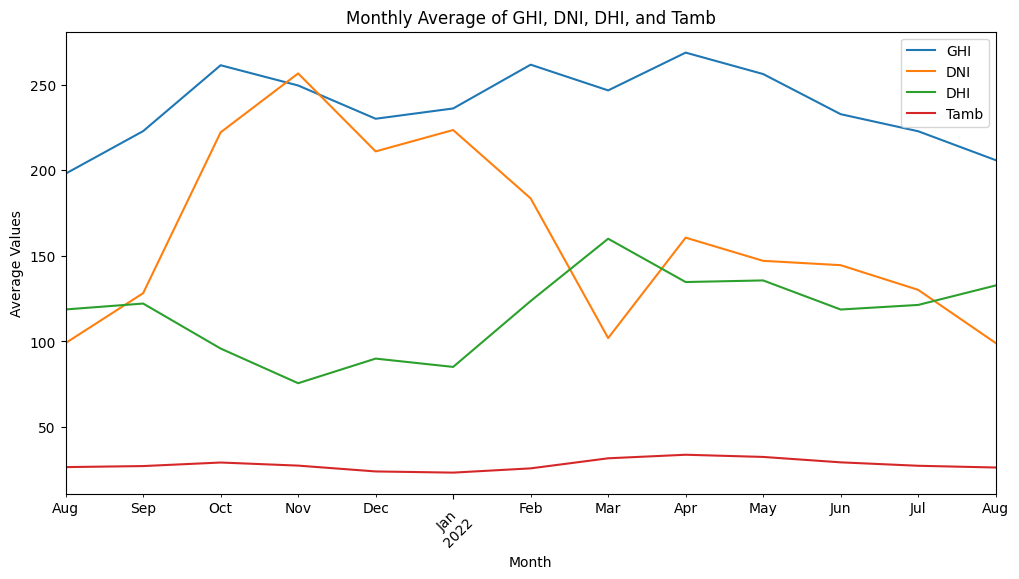

In [18]:
# Resample the data to calculate monthly averages
monthly_avg = df.set_index('Timestamp').resample('M').mean()
# Plot the monthly averages for GHI, DNI, DHI, and Tamb
monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

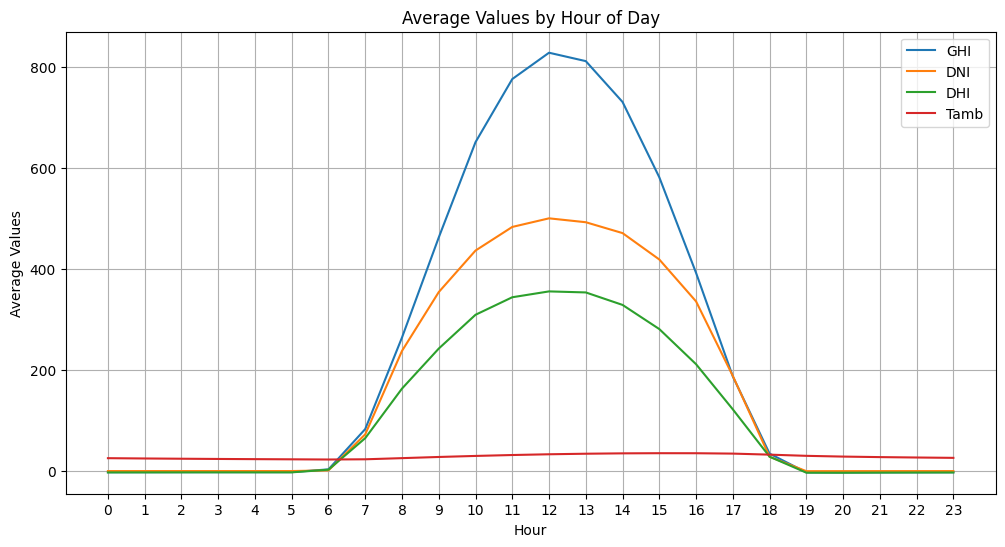

In [19]:
# Extract the hour from the Timestamp for daily analysis
df['Hour'] = df['Timestamp'].dt.hour
# Group by hour and calculate the average for each variable
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
# Plot the average values by hour of the day
hourly_avg.plot(kind='line', figsize=(12, 6))
plt.title('Average Values by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Values')
plt.xticks(range(24))
plt.grid()
plt.show()

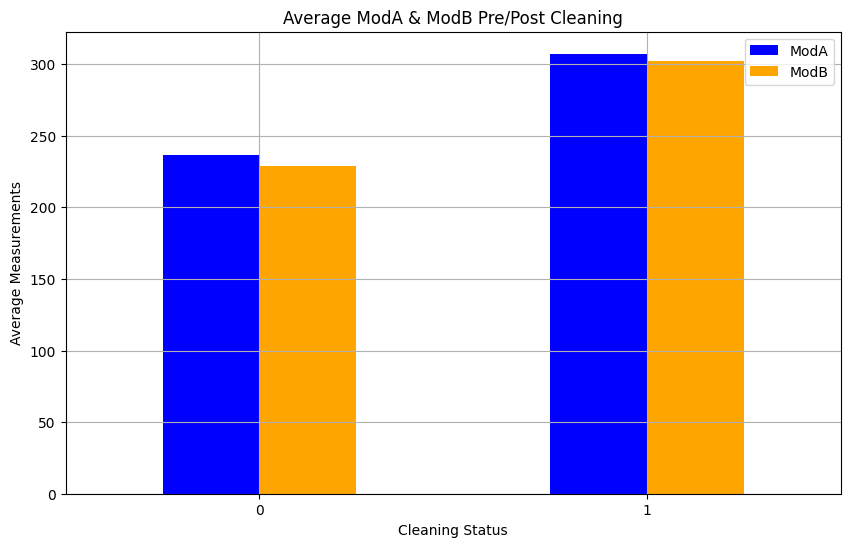

In [20]:
import matplotlib.pyplot as plt

# Group by 'Cleaning' and calculate mean for ModA and ModB
cleaned_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plotting the averages
cleaned_avg.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Status')
plt.ylabel('Average Measurements')
plt.xticks(rotation=0)
plt.grid()
plt.show()

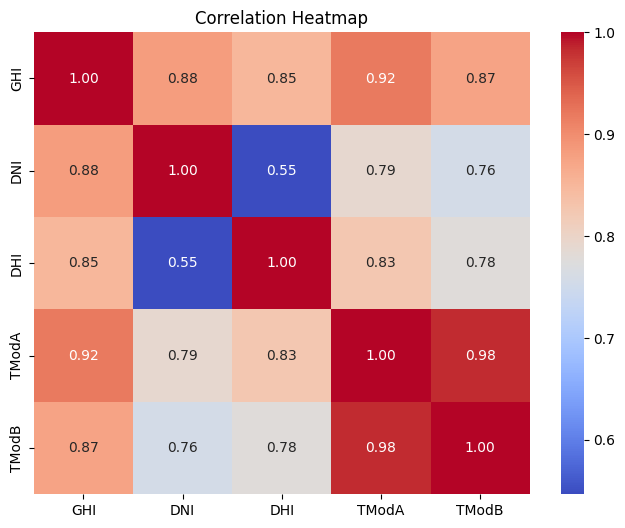

In [21]:
import seaborn as sns

# Select relevant columns for correlation analysis
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

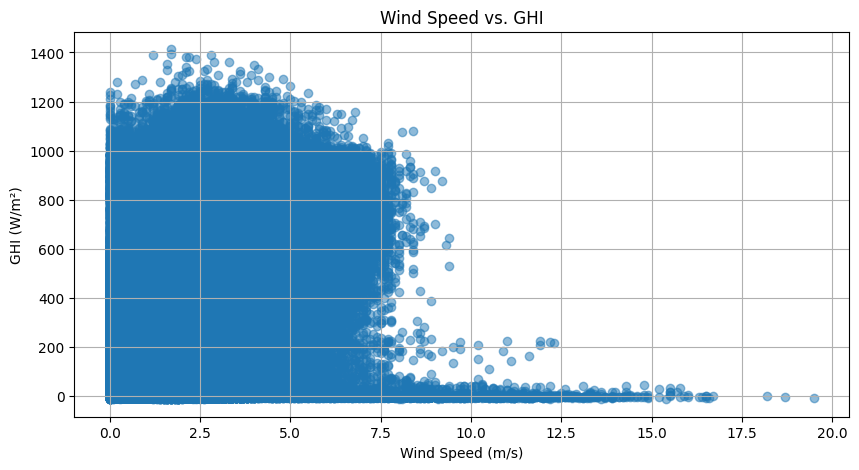

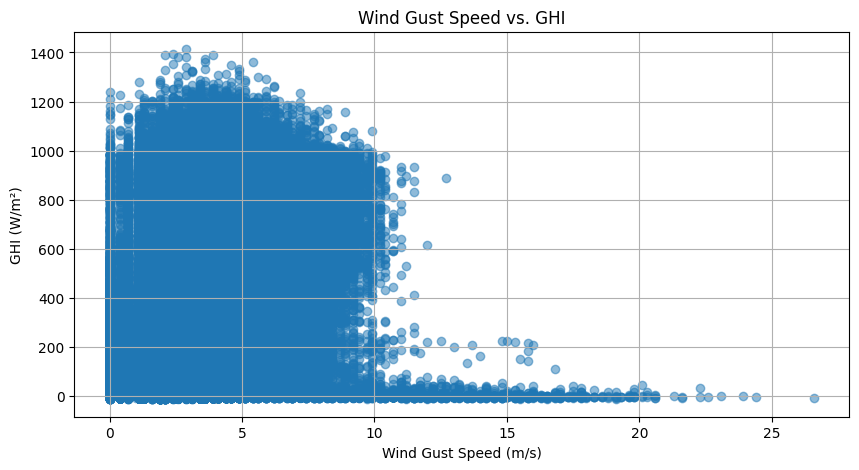

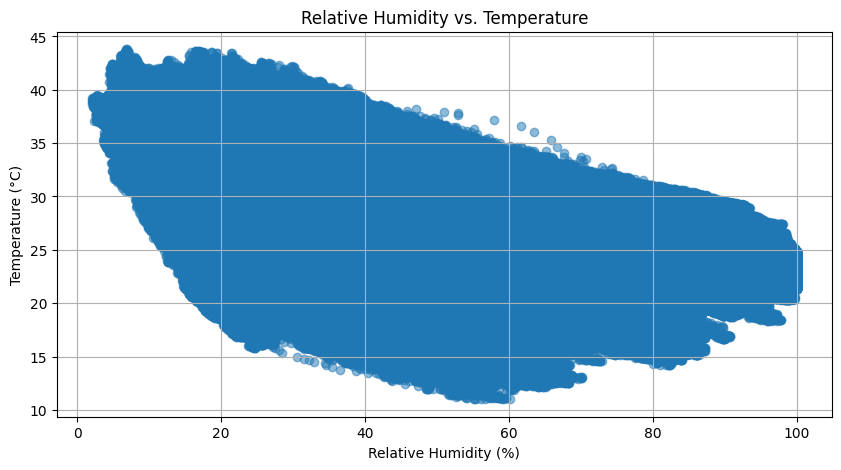

In [22]:
# WS vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

# WSgust vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.title('Wind Gust Speed vs. GHI')
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

# RH vs. Tamb
plt.figure(figsize=(10, 5))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

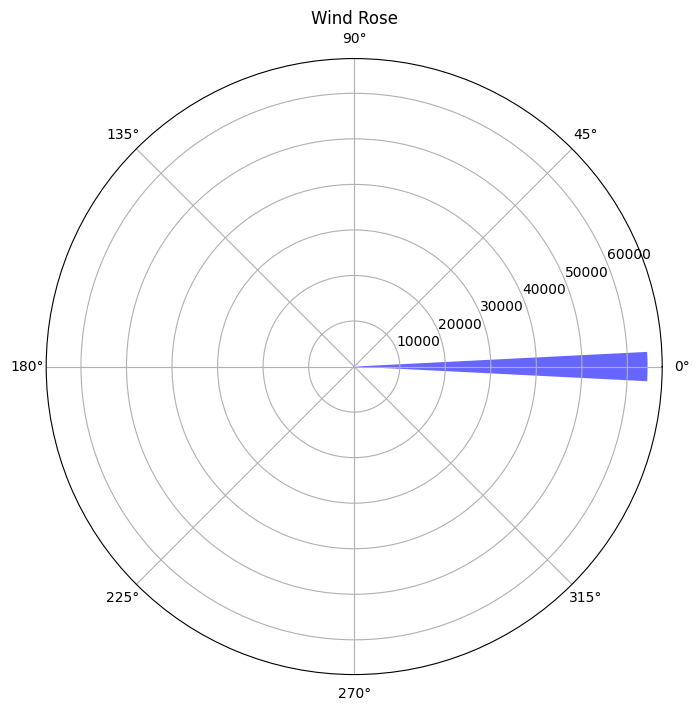

In [23]:
# Wind rose plot using matplotlib
from math import pi

# Prepare data for wind rose
wind_data = df.groupby('WD').size()
angles = wind_data.index * (2 * pi / 360)
radii = wind_data.values

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.bar(angles, radii, width=0.1, color='blue', alpha=0.6)
ax.set_title('Wind Rose')
plt.show()

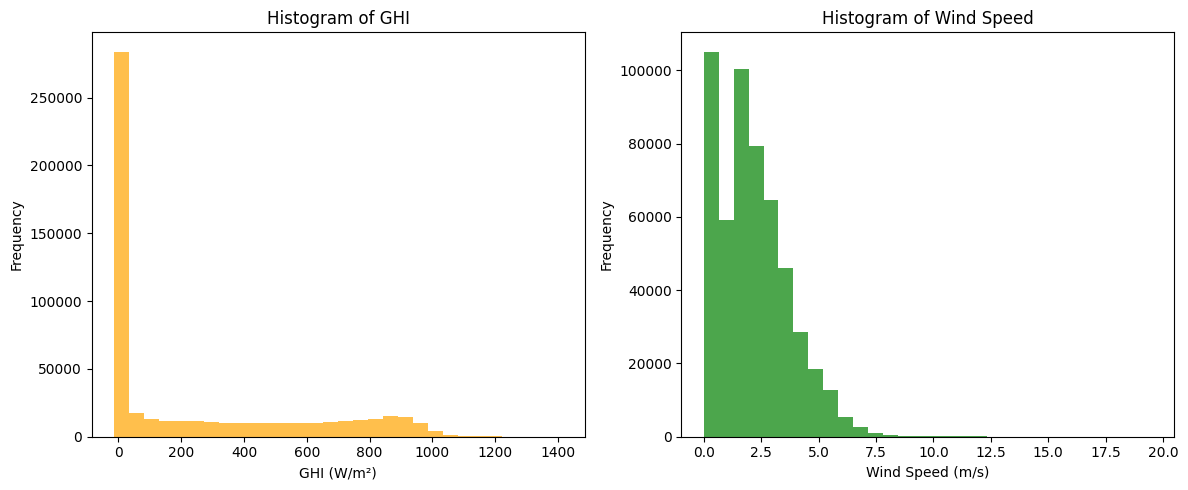

In [24]:
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

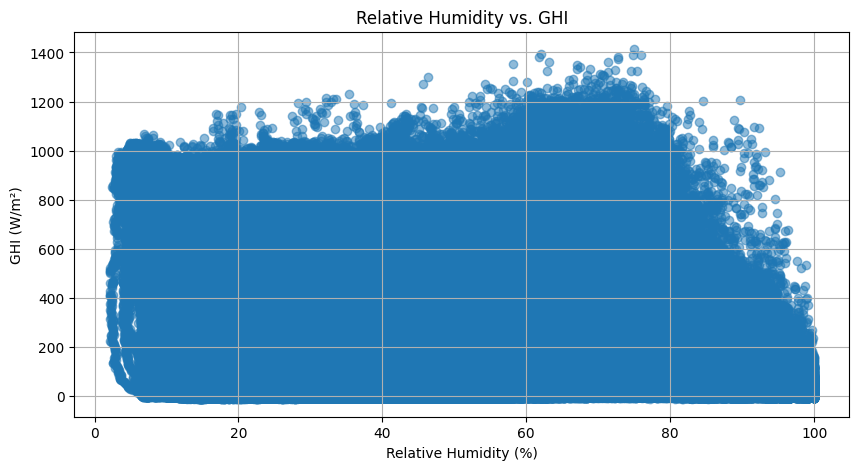

In [25]:
# Scatter plot for RH vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

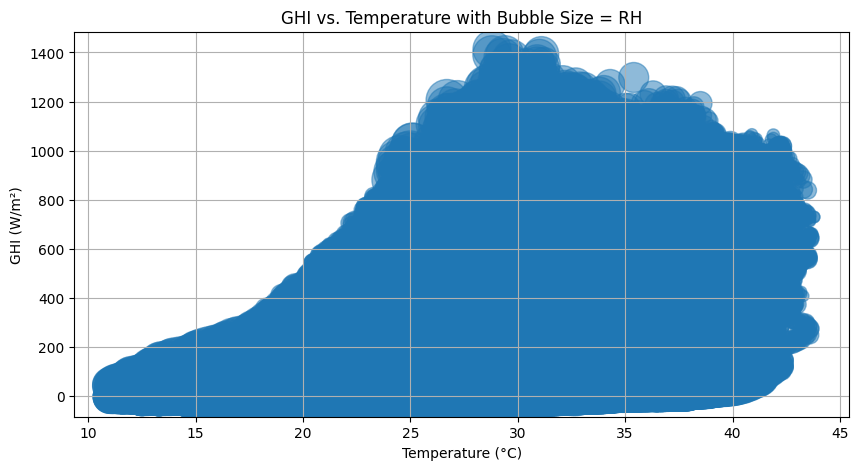

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Temperature with Bubble Size = RH')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()